# Zachary DeNoto
DSC 550

Student Alcohol Consumption Graphics Analysis



In [76]:
#imports necessary libraries
import pandas as pd
import yellowbrick

In [77]:
#Step 1:  Loads data into a dataframe
addr2 = "student-por.csv"
data2 = pd.read_csv(addr2)

In [78]:
# Step 2:  Checks the dimension of the table
print("The dimension of the table is: ", data2.shape)

The dimension of the table is:  (649, 33)


In [79]:
#Step 3:  Looks at the data
print(data2.head(5))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [80]:
#Step 5:  Looks at the type of variables in the table
print("Describe Data")
print(data2.describe())
print("Summarized Data")
print(data2.describe(include=['O']))

Describe Data
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.95

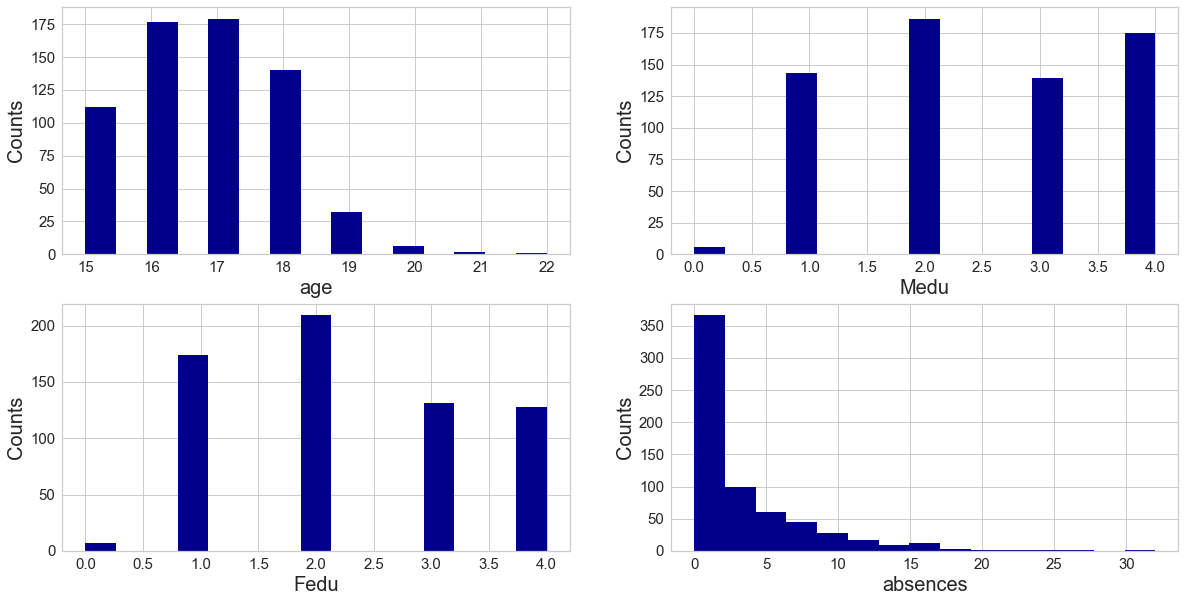

In [81]:
#Step 6: Import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['age', 'Medu', 'Fedu', 'absences']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data2[num_features[idx]], bins = 15, color = 'darkblue')
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

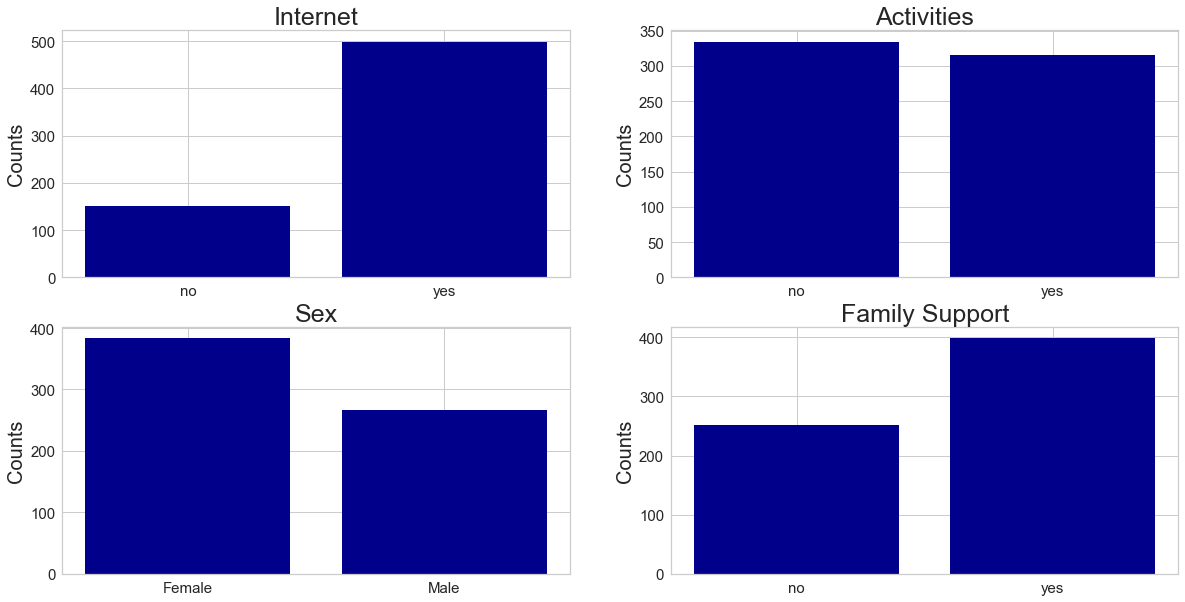

In [82]:
#7:  Barcharts: Sets up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Internet = data2.groupby('internet').size().reset_index(name='Counts')['internet']
Y_Internet = data2.groupby('internet').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Internet, Y_Internet, color = 'darkblue')
axes[0, 0].set_title('Internet', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Activities = data2.groupby('activities').size().reset_index(name='Counts')['activities']
Y_Activities = data2.groupby('activities').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Activities, Y_Activities, color = 'darkblue')
axes[0, 1].set_title('Activities', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = data2.replace({'sex': {'M': 'Male', 'F': 'Female'}}).groupby('sex').size().reset_index(name='Counts')['sex']
Y_Sex = data2.replace({'sex': {'M': 'Male', 'F': 'Female'}}).groupby('sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex, color = 'darkblue')
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Family = data2.groupby('famsup').size().reset_index(name='Counts')['famsup']
Y_Family = data2.groupby('famsup').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Family, Y_Family, color = 'darkblue')
axes[1, 1].set_title('Family Support', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()

C:\Users\Zack\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


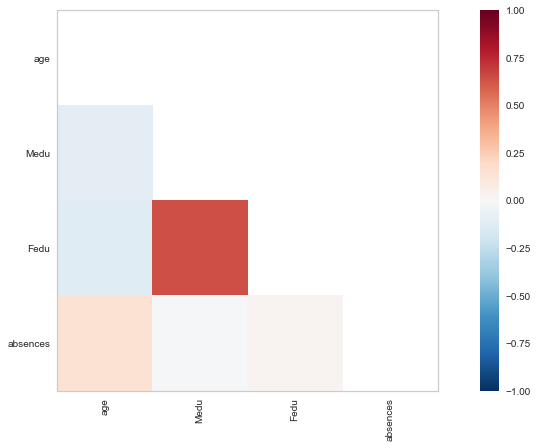

In [83]:
#Step 8: Pearson Ranking for variables
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data2[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.show()


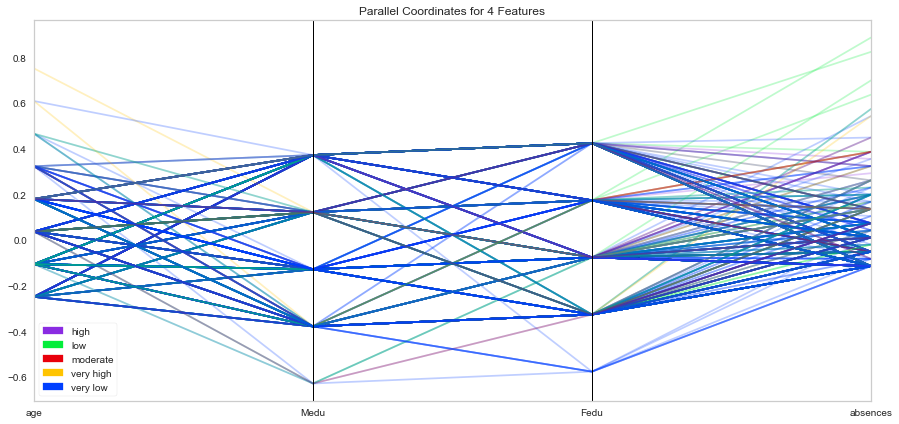

In [84]:
# Step 9:  Compare variables against Weekday Alchol Consumption
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette

set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['very low', 'low','moderate','high', 'very high']
num_features = ['age', 'Medu', 'Fedu', 'absences']

# copy data to a new dataframe
data_norm = data2.copy()
# normalize data 
for feature in num_features:
    data_norm[feature] = (data2[feature] - data2[feature].mean(skipna=True)) / (
                data2[feature].max(skipna=True) - data2[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data2.Dalc.values

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
visualizer.poof()  # Draw/show/poof the data

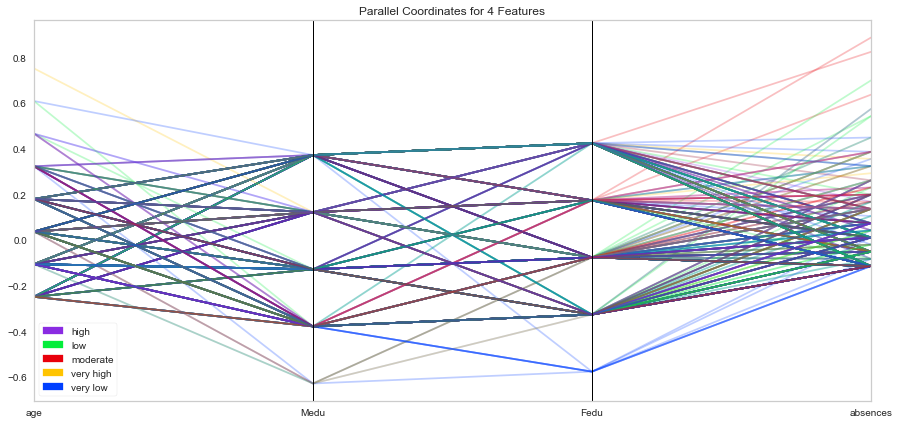

In [85]:
#Compare variables against Weekend Alchol Consumption
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette

set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['very low', 'low','moderate','high', 'very high']
num_features = ['age', 'Medu', 'Fedu', 'absences']

# copy data to a new dataframe
data_norm = data2.copy()
# normalize data 
for feature in num_features:
    data_norm[feature] = (data2[feature] - data2[feature].mean(skipna=True)) / (
                data2[feature].max(skipna=True) - data2[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data2.Walc.values

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.transform(X)  # Transform the data
visualizer.poof()  # Draw/show/poof the data

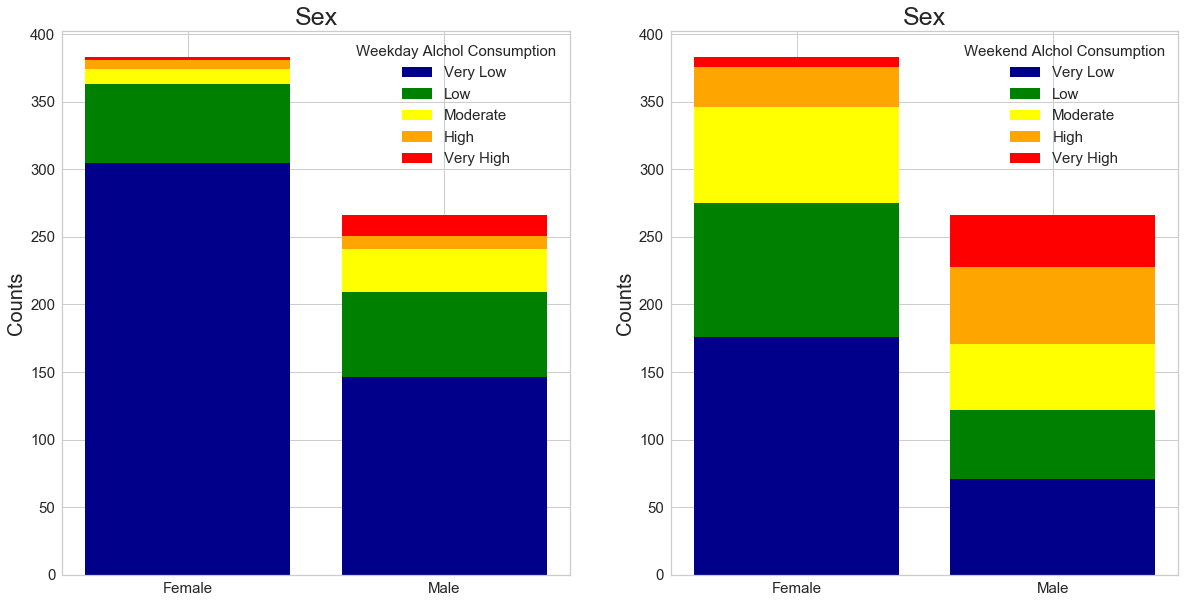

In [86]:
#Stacked bar charts to compare weekday versus weekend  alcohol consumption for sex
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# make the data read to feed into the visulizer
sex_verylow = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'sex': {'F':'Female', 'M': 'Male'}})[data2['Dalc']==1]['sex'].value_counts()
sex_low = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'sex': {'F':'Female', 'M': 'Male'}})[data2['Dalc']==2]['sex'].value_counts()
sex_mod = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'sex': {'F':'Female', 'M': 'Male'}})[data2['Dalc']==3]['sex'].value_counts()
sex_high = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'sex': {'F':'Female', 'M': 'Male'}})[data2['Dalc']==4]['sex'].value_counts()
sex_veryhigh = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'sex': {'F':'Female', 'M': 'Male'}})[data2['Dalc']==5]['sex'].value_counts()

sex_low = sex_low.reindex(index = sex_verylow.index)
sex_mod = sex_mod.reindex(index = sex_low.index)
sex_high = sex_high.reindex(index = sex_mod.index)
sex_veryhigh = sex_veryhigh.reindex(index = sex_high.index)

# make the bar plot
p1 = axes[0].bar(sex_verylow.index, sex_verylow.values,color='darkblue')
p2 = axes[0].bar(sex_low.index, sex_low.values,bottom=sex_verylow.values,color = 'green')
p3 = axes[0].bar(sex_mod.index, sex_mod.values,bottom=sex_verylow.values+sex_low.values, color = 'yellow')                                                                                                         
p4 = axes[0].bar(sex_high.index, sex_high.values,bottom=sex_verylow.values+sex_low.values+sex_mod.values, color = 'orange')                                                                                                                                                                                                                                                                                                                                                                                                                                
p5 = axes[0].bar(sex_veryhigh.index, sex_veryhigh.values, bottom=sex_verylow.values+sex_low.values+sex_mod.values+sex_high.values, color = 'red')
                                                                                                                                                                                                              
axes[0].set_title('Sex', fontsize=25)
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('Very Low', 'Low','Moderate','High','Very High'), fontsize = 15,bbox_to_anchor=(1,1),title = 'Weekday Alchol Consumption', title_fontsize = 15)



# make the data read to feed into the visulizer
sex_verylow2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'sex': {'F':'Female', 'M': 'Male'}})[data2['Walc']==1]['sex'].value_counts()
sex_low2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'sex': {'F':'Female', 'M': 'Male'}})[data2['Walc']==2]['sex'].value_counts()
sex_mod2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'sex': {'F':'Female', 'M': 'Male'}})[data2['Walc']==3]['sex'].value_counts()
sex_high2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'sex': {'F':'Female', 'M': 'Male'}})[data2['Walc']==4]['sex'].value_counts()
sex_veryhigh2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'sex': {'F':'Female', 'M': 'Male'}})[data2['Walc']==5]['sex'].value_counts()

sex_low2 = sex_low2.reindex(index = sex_verylow2.index)
sex_mod2 = sex_mod2.reindex(index = sex_low2.index)
sex_high2 = sex_high2.reindex(index = sex_mod2.index)
sex_veryhigh2 = sex_veryhigh2.reindex(index = sex_high2.index)

# make the bar plot
p6 = axes[1].bar(sex_verylow2.index, sex_verylow2.values,color='darkblue')
p7 = axes[1].bar(sex_low2.index, sex_low2.values,bottom=sex_verylow2.values,color = 'green')
p8 = axes[1].bar(sex_mod2.index, sex_mod2.values,bottom=sex_verylow2.values+sex_low2.values, color = 'yellow')                                                                                                         
p9 = axes[1].bar(sex_high2.index, sex_high2.values,bottom=sex_verylow2.values+sex_low2.values+sex_mod2.values, color = 'orange')                                                                                                                                                                                                                                                                                                                                                                                                                                
p10 = axes[1].bar(sex_veryhigh2.index, sex_veryhigh2.values, bottom=sex_verylow2.values+sex_low2.values+sex_mod2.values+sex_high2.values, color = 'red')
                                                                                                                                                                                                              
axes[1].set_title('Sex', fontsize=25)
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('Very Low', 'Low','Moderate','High','Very High'), fontsize = 15,bbox_to_anchor=(1,1), title = 'Weekend Alchol Consumption', title_fontsize = 15)





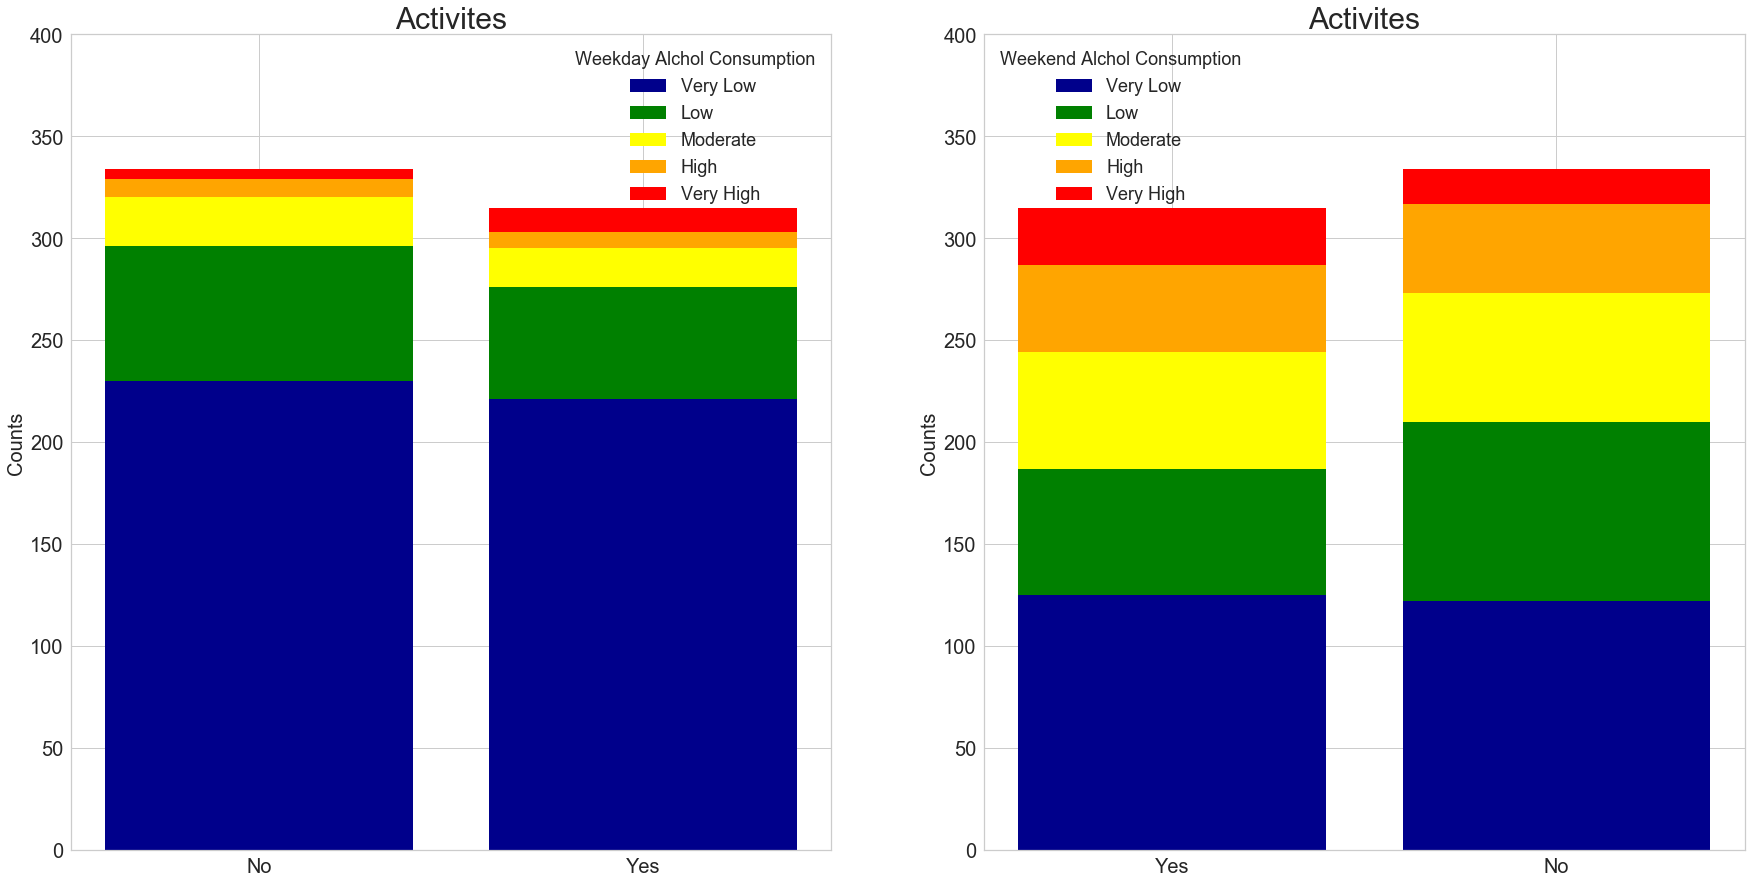

In [87]:
#Stacked bar charts to compare weekday versus weekend  alcohol consumption for activities
#set up the figure size
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 15)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# make the data read to feed into the visulizer
Act_verylow = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'activities': {'yes':'Yes', 'no': 'No'}})[data2['Dalc']==1]['activities'].value_counts()
Act_low = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'activities': {'yes':'Yes', 'no': 'No'}})[data2['Dalc']==2]['activities'].value_counts()
Act_mod = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'activities': {'yes':'Yes', 'no': 'No'}})[data2['Dalc']==3]['activities'].value_counts()
Act_high = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'activities': {'yes':'Yes', 'no': 'No'}})[data2['Dalc']==4]['activities'].value_counts()
Act_veryhigh = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'activities': {'yes':'Yes', 'no': 'No'}})[data2['Dalc']==5]['activities'].value_counts()

Act_low = Act_low.reindex(index = Act_verylow.index)
Act_mod = Act_mod.reindex(index = Act_low.index)
Act_high = Act_high.reindex(index = Act_mod.index)
Act_veryhigh = Act_veryhigh.reindex(index = Act_high.index)

# make the bar plot
p1 = axes[0].bar(Act_verylow.index, Act_verylow.values,color='darkblue')
p2 = axes[0].bar(Act_low.index, Act_low.values,bottom=Act_verylow.values,color = 'green')
p3 = axes[0].bar(Act_mod.index, Act_mod.values,bottom=Act_verylow.values+Act_low.values, color = 'yellow')                                                                                                         
p4 = axes[0].bar(Act_high.index, Act_high.values,bottom=Act_verylow.values+Act_low.values+Act_mod.values, color = 'orange')                                                                                                                                                                                                                                                                                                                                                                                                                                
p5 = axes[0].bar(Act_veryhigh.index, Act_veryhigh.values, bottom=Act_verylow.values+Act_low.values+Act_mod.values+Act_high.values, color = 'red')
                                                                                                                                                                                                              
axes[0].set_title('Activites', fontsize=30)
axes[0].set_yticks(np.arange(0,450,50))
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='both', labelsize=20)
axes[0].legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('Very Low', 'Low','Moderate','High','Very High'), title = 'Weekday Alchol Consumption', fontsize = 18, title_fontsize = 18 )



# make the data read to feed into the visulizer
Act_verylow2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'activities': {'yes':'Yes', 'no': 'No'}})[data2['Walc']==1]['activities'].value_counts()
Act_low2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'activities': {'yes':'Yes', 'no': 'No'}})[data2['Walc']==2]['activities'].value_counts()
Act_mod2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'activities': {'yes':'Yes', 'no': 'No'}})[data2['Walc']==3]['activities'].value_counts()
Act_high2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'activities': {'yes':'Yes', 'no': 'No'}})[data2['Walc']==4]['activities'].value_counts()
Act_veryhigh2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'activities': {'yes':'Yes', 'no': 'No'}})[data2['Walc']==5]['activities'].value_counts()

Act_low2 = Act_low2.reindex(index = Act_verylow2.index)
Act_mod2 = Act_mod2.reindex(index = Act_low2.index)
Act_high2 = Act_high2.reindex(index = Act_mod2.index)
Act_veryhigh2 = Act_veryhigh2.reindex(index = Act_high2.index)

# make the bar plot
p1 = axes[1].bar(Act_verylow2.index, Act_verylow2.values,color='darkblue')
p2 = axes[1].bar(Act_low2.index, Act_low2.values,bottom=Act_verylow2.values,color = 'green')
p3 = axes[1].bar(Act_mod2.index, Act_mod2.values,bottom=Act_verylow2.values+Act_low2.values, color = 'yellow')                                                                                                         
p4 = axes[1].bar(Act_high2.index, Act_high2.values,bottom=Act_verylow2.values+Act_low2.values+Act_mod2.values, color = 'orange')                                                                                                                                                                                                                                                                                                                                                                                                                                
p5 = axes[1].bar(Act_veryhigh2.index, Act_veryhigh2.values, bottom=Act_verylow2.values+Act_low2.values+Act_mod2.values+Act_high2.values, color = 'red')
                                                                                                                                                                                                              
axes[1].set_title('Activites', fontsize=30)
axes[1].set_yticks(np.arange(0,450,50))
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='both', labelsize=20)
axes[1].legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('Very Low', 'Low','Moderate','High','Very High'), title = 'Weekend Alchol Consumption', fontsize = 18, title_fontsize = 18 )


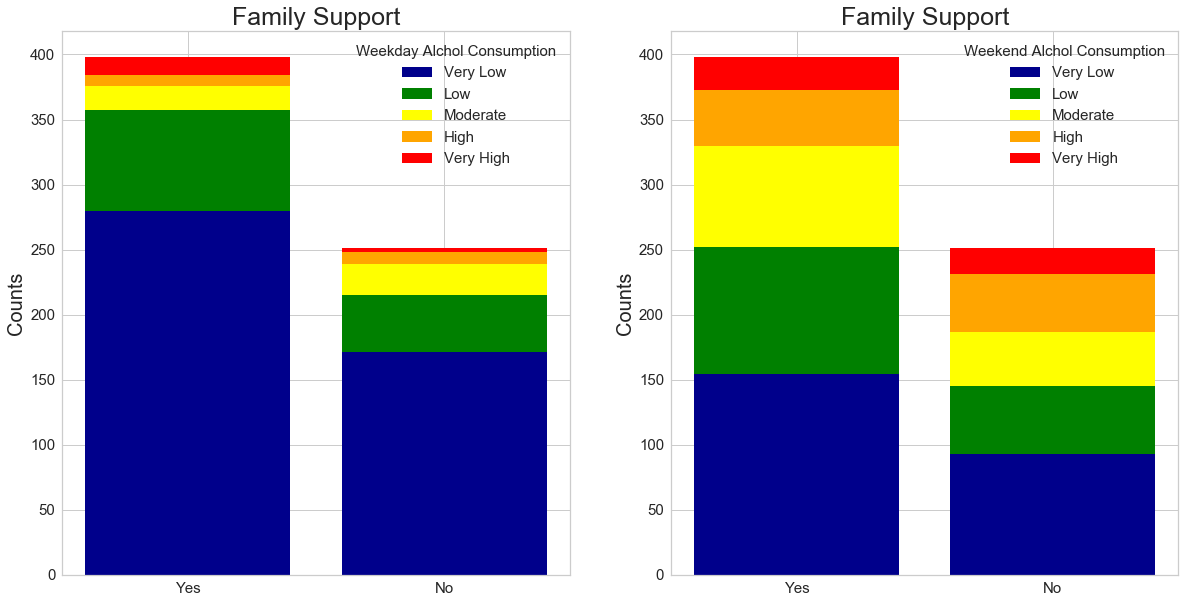

In [88]:
#Stacked bar charts to compare weekday versus weekend  alcohol consumption for family support
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# make the data read to feed into the visulizer
Fam_verylow = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'famsup': {'yes':'Yes', 'no': 'No'}})[data2['Dalc']==1]['famsup'].value_counts()
Fam_low = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'famsup': {'yes':'Yes', 'no': 'No'}})[data2['Dalc']==2]['famsup'].value_counts()
Fam_mod = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'famsup': {'yes':'Yes', 'no': 'No'}})[data2['Dalc']==3]['famsup'].value_counts()
Fam_high = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'famsup': {'yes':'Yes', 'no': 'No'}})[data2['Dalc']==4]['famsup'].value_counts()
Fam_veryhigh = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'famsup': {'yes':'Yes', 'no': 'No'}})[data2['Dalc']==5]['famsup'].value_counts()

Fam_low = Fam_low.reindex(index = Fam_verylow.index)
Fam_mod = Fam_mod.reindex(index = Fam_low.index)
Fam_high = Fam_high.reindex(index = Fam_mod.index)
Fam_veryhigh = Fam_veryhigh.reindex(index = Fam_high.index)

# make the bar plot
p1 = axes[0].bar(Fam_verylow.index, Fam_verylow.values,color='darkblue')
p2 = axes[0].bar(Fam_low.index, Fam_low.values,bottom=Fam_verylow.values,color = 'green')
p3 = axes[0].bar(Fam_mod.index, Fam_mod.values,bottom=Fam_verylow.values+Fam_low.values, color = 'yellow')                                                                                                         
p4 = axes[0].bar(Fam_high.index, Fam_high.values,bottom=Fam_verylow.values+Fam_low.values+Fam_mod.values, color = 'orange')                                                                                                                                                                                                                                                                                                                                                                                                                                
p5 = axes[0].bar(Fam_veryhigh.index, Fam_veryhigh.values, bottom=Fam_verylow.values+Fam_low.values+Fam_mod.values+Fam_high.values, color = 'red')
                                                                                                                                                                                                              
axes[0].set_title('Family Support', fontsize=25)
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('Very Low', 'Low','Moderate','High','Very High'), fontsize = 15,bbox_to_anchor=(1,1), title = 'Weekday Alchol Consumption', title_fontsize = 15)



# make the data read to feed into the visulizer
Fam_verylow2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'famsup': {'yes':'Yes', 'no': 'No'}})[data2['Walc']==1]['famsup'].value_counts()
Fam_low2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'famsup': {'yes':'Yes', 'no': 'No'}})[data2['Walc']==2]['famsup'].value_counts()
Fam_mod2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'famsup': {'yes':'Yes', 'no': 'No'}})[data2['Walc']==3]['famsup'].value_counts()
Fam_high2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'famsup': {'yes':'Yes', 'no': 'No'}})[data2['Walc']==4]['famsup'].value_counts()
Fam_veryhigh2 = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}}).replace({'famsup': {'yes':'Yes', 'no': 'No'}})[data2['Walc']==5]['famsup'].value_counts()

Fam_low2 = Fam_low2.reindex(index = Fam_verylow2.index)
Fam_mod2 = Fam_mod2.reindex(index = Fam_low2.index)
Fam_high2 = Fam_high2.reindex(index = Fam_mod2.index)
Fam_veryhigh2 = Fam_veryhigh2.reindex(index = Fam_high2.index)

# make the bar plot
p1 = axes[1].bar(Fam_verylow2.index, Fam_verylow2.values,color='darkblue')
p2 = axes[1].bar(Fam_low2.index, Fam_low2.values,bottom=Fam_verylow2.values,color = 'green')
p3 = axes[1].bar(Fam_mod2.index, Fam_mod2.values,bottom=Fam_verylow2.values+Fam_low2.values, color = 'yellow')                                                                                                         
p4 = axes[1].bar(Fam_high2.index, Fam_high2.values,bottom=Fam_verylow2.values+Fam_low2.values+Fam_mod2.values, color = 'orange')                                                                                                                                                                                                                                                                                                                                                                                                                                
p5 = axes[1].bar(Fam_veryhigh2.index, Fam_veryhigh2.values, bottom=Fam_verylow2.values+Fam_low2.values+Fam_mod2.values+Fam_high2.values, color = 'red')
                                                                                                                                                                                                              
axes[1].set_title('Family Support', fontsize=25)
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('Very Low', 'Low','Moderate','High','Very High'), fontsize = 15,bbox_to_anchor=(1,1), title = 'Weekend Alchol Consumption', title_fontsize = 15 )


In [89]:
#Step 11: Eliminating and replacing features

#eliminates unnecessary features
data2 = data2.drop(columns = ['school','address','famsize','Pstatus','Mjob','Fjob', 'reason', 'guardian'])

#replaces features names
data2 = data2.rename(columns={"Medu": "Mothers_Education", "Fedu": "Fathers_Education"})

#replaces features 
data2 = data2.replace({'sex' : {'F': 'Female', 'M': 'Male'}})


# import package
import numpy as np

# log-transformation function
def log_transformation(data):
    return data.apply(np.log1p)


data2['log_absences'] = log_transformation(data2['absences'])

print(data2.head(5))

      sex  age  Mothers_Education  Fathers_Education  traveltime  studytime  \
0  Female   18                  4                  4           2          2   
1  Female   17                  1                  1           1          2   
2  Female   15                  1                  1           1          2   
3  Female   15                  4                  2           1          3   
4  Female   16                  3                  3           1          2   

   failures schoolsup famsup paid  ... freetime goout Dalc Walc health  \
0         0       yes     no   no  ...        3     4    1    1      3   
1         0        no    yes   no  ...        3     3    1    1      3   
2         0       yes     no   no  ...        3     2    2    3      3   
3         0        no    yes   no  ...        2     2    1    1      5   
4         0        no    yes   no  ...        3     2    1    2      5   

   absences  G1  G2  G3  log_absences  
0         4   0  11  11      1.609438  


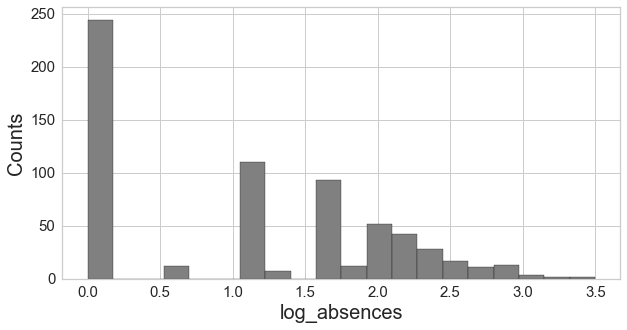

In [90]:
#Step 12 - adjusts skewed data for absences
#checks the distribution using histogram
# set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data2['log_absences'], bins=20, color = 'gray', edgecolor = 'black')
plt.xlabel('log_absences', fontsize=20),
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()


In [91]:
#Step 13 - convert categorical data to numbers
#gets the categorical data (8 features)
categorical_features = ['schoolsup', 'famsup', 'paid','activities', 'nursery', 'higher','internet', 'romantic']
cat_data = data2[categorical_features]
cat_data = cat_data.replace({'yes': 1, 'no': 0})
# One Hot Encoding 
cat_data_dummies = pd.get_dummies(cat_data, drop_first= True)
# checks the data
print(cat_data_dummies.head(10))


   schoolsup  famsup  paid  activities  nursery  higher  internet  romantic
0          1       0     0           0        1       1         0         0
1          0       1     0           0        0       1         1         0
2          1       0     0           0        1       1         1         0
3          0       1     0           1        1       1         1         1
4          0       1     0           0        1       1         0         0
5          0       1     0           1        1       1         1         0
6          0       0     0           0        1       1         1         0
7          1       1     0           0        1       1         0         0
8          0       1     0           0        1       1         1         0
9          0       1     0           1        1       1         1         0


In [92]:
#Step 14 - creates a whole features dataset that can be used for train and validation data splitting

# import packages
from sklearn.model_selection import train_test_split

# replace categorical features to numbers so we can run analysis
data2[categorical_features] = data2[categorical_features].replace({'yes': 1, 'no': 0})
data2['sex'] = data2['sex'].replace({'Male': 1, 'Female': 0})


x_mod = data2

# creates a whole target dataset that can be used for train and validation data splitting
y_mod = data2.replace({'Dalc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}})['Dalc']

# separate data into training and validation and check the details of the datasets
# split the datas
trainingx, valx, trainingy, valy = train_test_split(x_mod, y_mod, test_size =0.3, random_state=11)

# number of samples in training and validation
print("The number of samples in the training set: ", trainingx.shape[0])
print("The number of samples in the validation set:", valx.shape[0])

# Prints consumption for weeday alcohol consumption
print('\n')
print('The number of weekday alchol consumption in the training set:')
print(trainingy.value_counts())

print('\n')
print('The number of weekday alchol consumption in the validation set:')
print(valy.value_counts())


The number of samples in the training set:  454
The number of samples in the validation set: 195


The number of weekday alchol consumption in the training set:
Very Low     311
Low           90
Moderate      31
Very High     12
High          10
Name: Dalc, dtype: int64


The number of weekday alchol consumption in the validation set:
Very Low     140
Low           31
Moderate      12
High           7
Very High      5
Name: Dalc, dtype: int64


C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


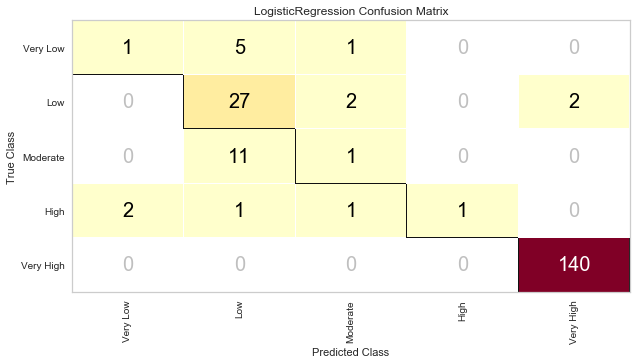

C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


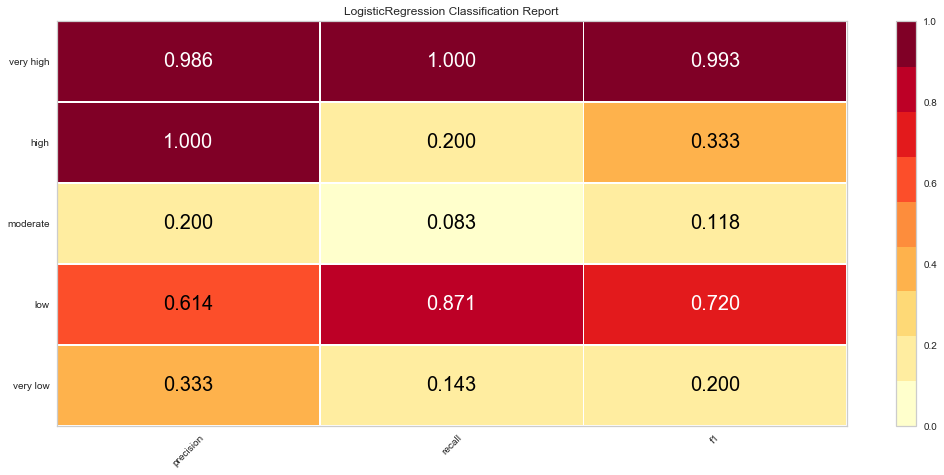

C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


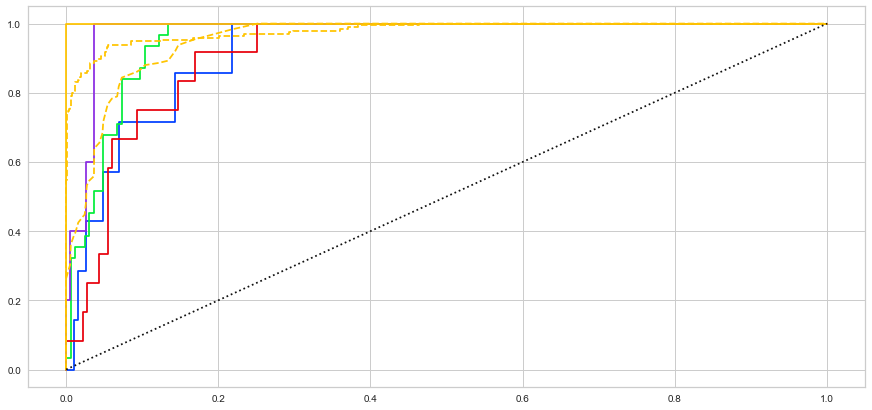

In [93]:
# Step 15 - Looks at evaluation Metrics
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC


#The ConfusionMatrix visualizer taxes a model
alc_consumtion = ['Very Low','Low', 'Moderate', 'High', 'Very High']
con_mat = ConfusionMatrix(LogisticRegression(), classes=alc_consumtion, percent=False)

#Fits the passed model.
con_mat.fit(trainingx, trainingy)

#predicts values based on the test data and creates a confusion matrix
con_mat.score(valx, valy)

# changes the fontsize of the labels
for front in con_mat.ax.texts:
    front.set_size(20)

#Shows the logistic regression confusion matrix
con_mat.poof()

# sets the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#Classification model for precision, recall and F1 score
vis = ClassificationReport(LogisticRegression(), classes=classes)

# Fits the training data to the visualizer
vis.fit(trainingx, trainingy)  

#Evaluates the model on the test data
vis.score(valx, valy)  

#Shows the visualization
x = vis.poof()


#Sets model to the ROC and AUC model
vis = ROCAUC(LogisticRegression())

# Fits the training data 
vis.fit(trainingx, trainingy)  

#Evaluates the model on the test data
vis.score(valx, valy)  

#Shows the visualization
x = visualizer.poof()


# Running the same tests as above but now for weekend alcohol consumption

In [94]:
# creates a whole target dataset that can be used for train and validation data splitting
y_mod = data2.replace({'Walc': {1: 'Very Low', 2: 'Low',3: 'Moderate',4: 'High',5: 'Very High'}})['Walc']

# separate data into training and validation and check the details of the datasets
# split the datas
trainingx, valx, trainingy, valy = train_test_split(x_mod, y_mod, test_size =0.3, random_state=11)

# number of samples in training and validation
print("The number of samples in the training set: ", trainingx.shape[0])
print("The number of samples in the validation set:", valx.shape[0])

# Prints consumption for weeday alcohol consumption
print('\n')
print('The number of weekday alchol consumption in the training set:')
print(trainingy.value_counts())

print('\n')
print('The number of weekday alchol consumption in the validation set:')
print(valy.value_counts())


The number of samples in the training set:  454
The number of samples in the validation set: 195


The number of weekday alchol consumption in the training set:
Very Low     168
Low          104
Moderate      88
High          59
Very High     35
Name: Walc, dtype: int64


The number of weekday alchol consumption in the validation set:
Very Low     79
Low          46
Moderate     32
High         28
Very High    10
Name: Walc, dtype: int64


C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


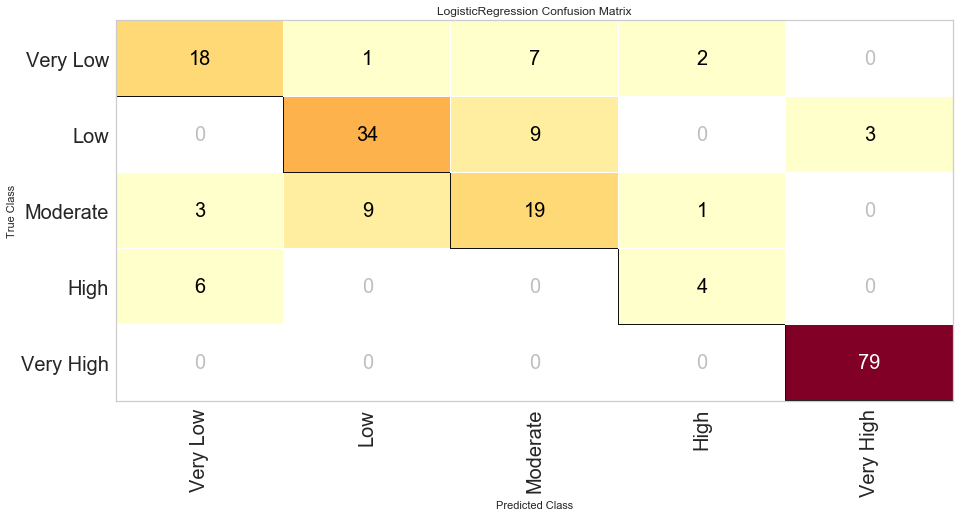

C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


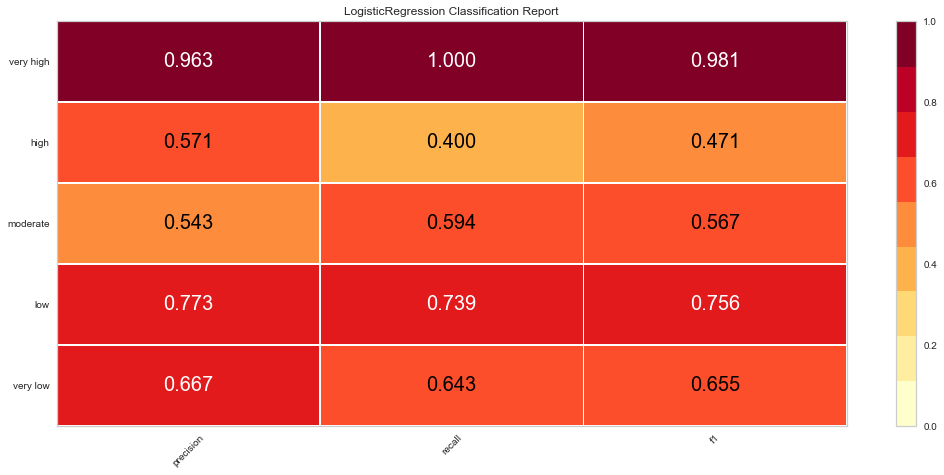

C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zack\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


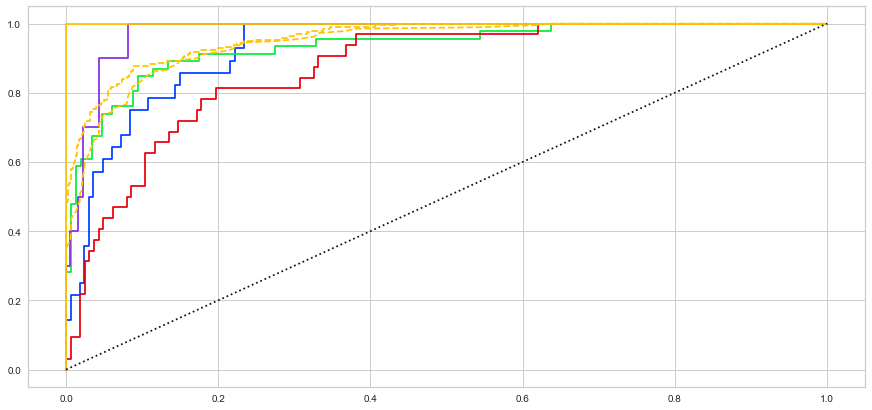

In [95]:
#The ConfusionMatrix visualizer taxes a model
alc_consumtion = ['Very Low','Low', 'Moderate', 'High', 'Very High']
con_mat = ConfusionMatrix(LogisticRegression(), classes=alc_consumtion, percent=False)

#Fits the passed model.
con_mat.fit(trainingx, trainingy)

#predicts values based on the test data and creates a confusion matrix
con_mat.score(valx, valy)

# changes the fontsize of the labels
for front in con_mat.ax.texts:
    front.set_size(20)

#Shows the logistic regression confusion matrix
con_mat.poof()

# sets the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#Classification model for precision, recall and F1 score
vis = ClassificationReport(LogisticRegression(), classes=classes)

# Fits the training data to the visualizer
vis.fit(trainingx, trainingy)  

#Evaluates the model on the test data
vis.score(valx, valy)  

#Shows the visualization
x = vis.poof()


#Sets model to the ROC and AUC model
vis = ROCAUC(LogisticRegression())

# Fits the training data 
vis.fit(trainingx, trainingy)  

#Evaluates the model on the test data
vis.score(valx, valy)  

#Shows the visualization
x = visualizer.poof()
